In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covidnigeria/covid.xlsx


In [2]:
%matplotlib inline
import matplotlib.pylab as plt
from fbprophet import Prophet

In [3]:
c = pd.read_excel('../input/covidnigeria/covid.xlsx')

In [4]:
c.head()

,Date,New Cases,Confirmed Case
0,2020-02-28,1,1
1,2020-02-29,0,1
2,2020-03-01,0,1
3,2020-03-02,0,1
4,2020-03-03,0,1


In [5]:
c19 = c[['Date', 'Confirmed Case']]

In [6]:
c19['Date'] = pd.to_datetime(c19.Date, format='%d/%m/%Y')
covid_ts = pd.Series(c19['Confirmed Case'].values, index=c19.Date, name='Number_of_Cases')
covid_ts.index = pd.DatetimeIndex(covid_ts.index, freq=covid_ts.index.inferred_freq)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
c19.head()

,Date,Confirmed Case
0,2020-02-28,1
1,2020-02-29,1
2,2020-03-01,1
3,2020-03-02,1
4,2020-03-03,1


In [8]:
c19.tail()

,Date,Confirmed Case
126,2020-07-03,27564
127,2020-07-04,28167
128,2020-07-05,28711
129,2020-07-06,29286
130,2020-07-07,29789


In [9]:
train = c19[0:124]

In [10]:
train.tail()

,Date,Confirmed Case
119,2020-06-26,23298
120,2020-06-27,24077
121,2020-06-28,24867
122,2020-06-29,25133
123,2020-06-30,25694


In [11]:
df_train = train.rename(columns={'Date': 'ds', 'Confirmed Case': 'y' })

In [12]:
df_train.tail()

,ds,y
119,2020-06-26,23298
120,2020-06-27,24077
121,2020-06-28,24867
122,2020-06-29,25133
123,2020-06-30,25694


In [13]:
test = c19[124:131]

In [14]:
df_test = test.rename(columns={'Date': 'ds', 'Confirmed Case': 'y' })

In [15]:
df_test

,ds,y
124,2020-07-01,26484
125,2020-07-02,27110
126,2020-07-03,27564
127,2020-07-04,28167
128,2020-07-05,28711
129,2020-07-06,29286
130,2020-07-07,29789


In [16]:
m = Prophet(interval_width = 0.95)
m.fit(df_train)
future = m.make_future_dataframe(periods =7)
future.tail()

,ds
126,2020-07-03
127,2020-07-04
128,2020-07-05
129,2020-07-06
130,2020-07-07


In [17]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][124:131]

,ds,yhat,yhat_lower,yhat_upper
124,2020-07-01,25956.104335,25673.897823,26254.708777
125,2020-07-02,26544.314217,26255.204494,26825.252715
126,2020-07-03,27143.138065,26829.704694,27459.216697
127,2020-07-04,27716.216044,27427.123320,28031.139844
128,2020-07-05,28261.342273,27922.989504,28571.783763
129,2020-07-06,28795.447238,28431.099162,29141.778106
130,2020-07-07,29338.613394,28938.885229,29732.378408


<Figure size 2160x1440 with 0 Axes>

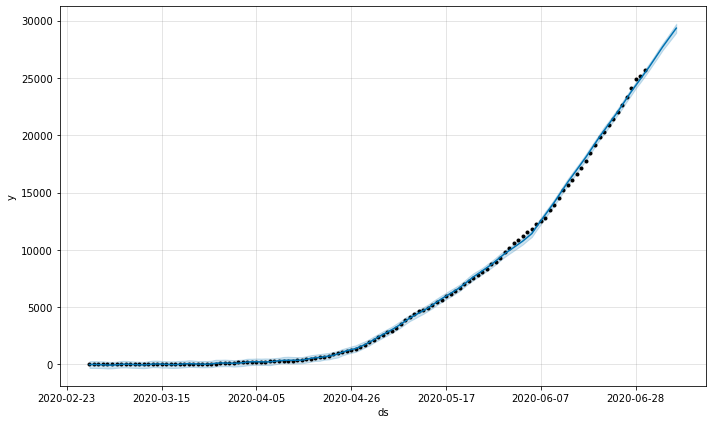

<Figure size 2160x1440 with 0 Axes>

In [18]:
confirmed_forecast_plot = m.plot(forecast)
plt.figure(figsize = (30,20))

The black dots represent the original values while the thick blue line represents the forecast values with the upper and lower tolerance

<Figure size 2160x1440 with 0 Axes>

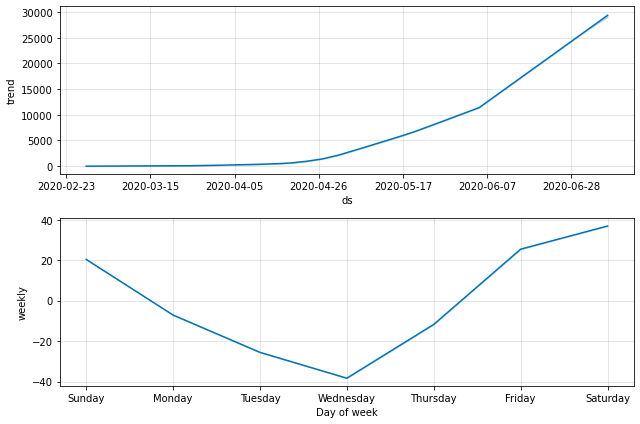

<Figure size 2160x1440 with 0 Axes>

In [19]:
confirmed_forecast_plot = m.plot_components(forecast)
plt.figure(figsize = (30,20))

In [20]:
c19_train = c19.rename(columns={'Date': 'ds', 'Confirmed Case': 'y' })

In [21]:
c19_train.tail()

,ds,y
126,2020-07-03,27564
127,2020-07-04,28167
128,2020-07-05,28711
129,2020-07-06,29286
130,2020-07-07,29789


In [22]:
m = Prophet(interval_width = 0.95)
m.fit(c19_train)
future = m.make_future_dataframe(periods =7)
future.tail()

,ds
133,2020-07-10
134,2020-07-11
135,2020-07-12
136,2020-07-13
137,2020-07-14


In [23]:
#predicting covid19 cases between 9th july and 14th july with upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][131:138]

,ds,yhat,yhat_lower,yhat_upper
131,2020-07-08,30508.707328,30364.774855,30646.950926
132,2020-07-09,31123.914710,30979.166866,31280.795325
133,2020-07-10,31737.392276,31572.279243,31905.935384
134,2020-07-11,32349.601404,32145.228774,32558.476753
135,2020-07-12,32930.634053,32689.246247,33170.165589
136,2020-07-13,33501.980171,33200.901419,33812.274837
137,2020-07-14,34077.380143,33746.283002,34433.133916


In [24]:
new_pred = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][131:138]
new_pred = new_pred.rename(columns={'ds': 'Date', 'yhat': 'Covid_19_Predicted_Confirmed_Cases','yhat_lower': 'Lower_Limit','yhat_upper': 'Upper_limit'})
new_pred

,Date,Covid_19_Predicted_Confirmed_Cases,Lower_Limit,Upper_limit
131,2020-07-08,30508.707328,30364.774855,30646.950926
132,2020-07-09,31123.914710,30979.166866,31280.795325
133,2020-07-10,31737.392276,31572.279243,31905.935384
134,2020-07-11,32349.601404,32145.228774,32558.476753
135,2020-07-12,32930.634053,32689.246247,33170.165589
136,2020-07-13,33501.980171,33200.901419,33812.274837
137,2020-07-14,34077.380143,33746.283002,34433.133916


<Figure size 2160x1440 with 0 Axes>

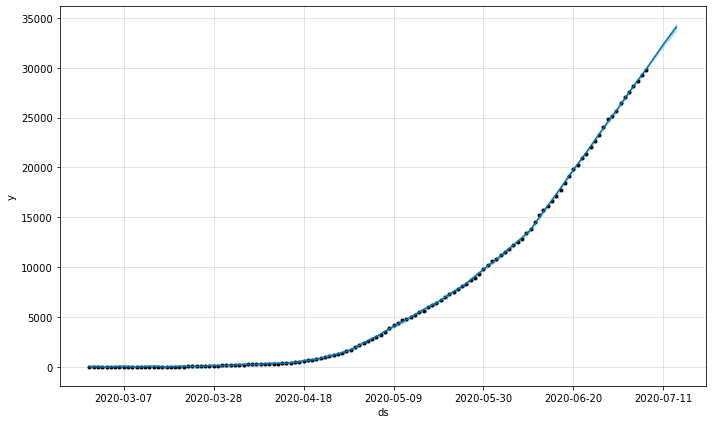

<Figure size 2160x1440 with 0 Axes>

In [25]:
confirmed_forecast_plot = m.plot(forecast)
plt.figure(figsize = (30,20))

<Figure size 2160x1440 with 0 Axes>

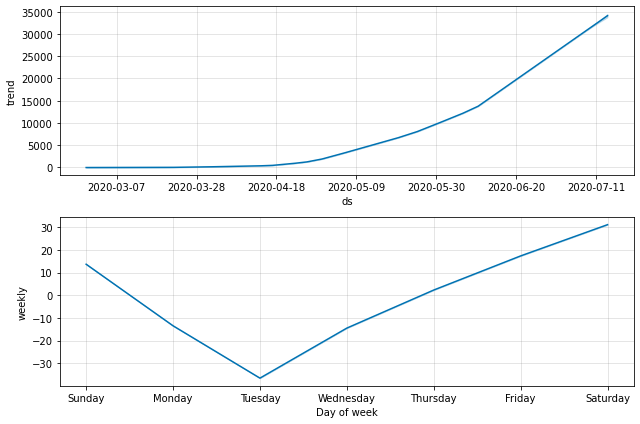

<Figure size 2160x1440 with 0 Axes>

In [26]:
confirmed_forecast_plot = m.plot_components(forecast)
plt.figure(figsize = (30,20))